In [23]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
import pandas as pd
from pmdarima import auto_arima
import matplotlib.pyplot as plt


In [24]:

train = pd.read_excel("BBDD_PD.xlsx")
test = pd.read_excel("BBDD_PD.xlsx", sheet_name="Escenarios proyectados")

train.rename(columns={"Tasa incumplimiento": "Tasa_incumplimiento"}, inplace=True)
test.rename(columns={"Tasa incumplimiento": "Tasa_incumplimiento"}, inplace=True)
train.set_index('FECHA', inplace=True)
test.set_index('FECHA', inplace=True)
# Establecer la frecuencia de los datos a trimestral
# train = train.asfreq('Q')
# test = test.asfreq('Q')

In [25]:
train.corr()

,Tasa_incumplimiento,Paro,PIB,Precio_vivienda,Mora_Adq_Vivienda
Tasa_incumplimiento,1.000000,0.933909,-0.886418,-0.788264,0.842455
Paro,0.933909,1.000000,-0.972709,-0.900567,0.873550
PIB,-0.886418,-0.972709,1.000000,0.854059,-0.805641
Precio_vivienda,-0.788264,-0.900567,0.854059,1.000000,-0.927240
Mora_Adq_Vivienda,0.842455,0.873550,-0.805641,-0.927240,1.000000


In [26]:
# Extraer la columna objetivo
y_train = train['Tasa_incumplimiento']

# Ajustar el modelo Auto-ARIMA con estacionalidad trimestral
modelo_auto_arima = auto_arima(
    y_train,
    seasonal=True,        # Activa la estacionalidad
    m=4,                  # Número de periodos por año (4 trimestres)
    stepwise=True,        # Búsqueda paso a paso de parámetros
    suppress_warnings=True,
    trace=True            # Para ver el progreso
)

# Resumen del modelo ajustado
print(modelo_auto_arima.summary())

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[4]             : AIC=-357.487, Time=0.20 sec
 ARIMA(0,2,0)(0,0,0)[4]             : AIC=-357.459, Time=0.03 sec
 ARIMA(1,2,0)(1,0,0)[4]             : AIC=-358.909, Time=0.05 sec
 ARIMA(0,2,1)(0,0,1)[4]             : AIC=-364.269, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[4]             : AIC=-364.974, Time=0.06 sec
 ARIMA(0,2,1)(1,0,0)[4]             : AIC=-364.141, Time=0.09 sec
 ARIMA(0,2,1)(1,0,1)[4]             : AIC=-360.048, Time=0.13 sec
 ARIMA(1,2,1)(0,0,0)[4]             : AIC=-362.603, Time=0.07 sec
 ARIMA(0,2,2)(0,0,0)[4]             : AIC=-365.778, Time=0.09 sec
 ARIMA(0,2,2)(1,0,0)[4]             : AIC=-363.648, Time=0.09 sec
 ARIMA(0,2,2)(0,0,1)[4]             : AIC=-363.780, Time=0.09 sec
 ARIMA(0,2,2)(1,0,1)[4]             : AIC=-360.125, Time=0.11 sec
 ARIMA(1,2,2)(0,0,0)[4]             : AIC=-364.280, Time=0.08 sec
 ARIMA(0,2,3)(0,0,0)[4]             : AIC=-365.309, Time=0.03 sec
 ARIMA(1,2,3)(0,0,0)[4]          

            Tasa incumplimiento predicha
FECHA                                   
2021-09-30                      0.003439
2021-12-31                      0.003495
2022-03-31                      0.003582
2022-06-30                      0.003702
2022-09-30                      0.003853
2022-12-31                      0.004036
2023-03-31                      0.004251
2023-06-30                      0.004497
2023-09-30                      0.004776
2023-12-31                      0.005085


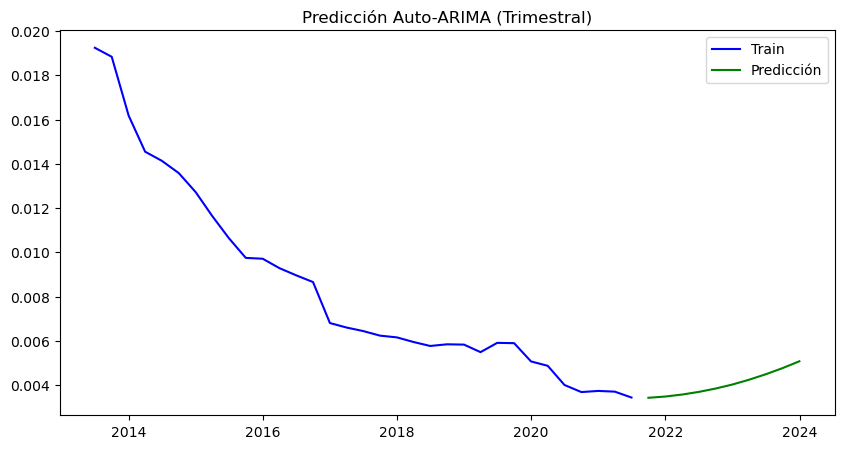

In [27]:
# Predicción para las fechas en el conjunto de prueba
predicciones = modelo_auto_arima.predict(n_periods=len(test))

# Convertir las predicciones en un DataFrame con las fechas del conjunto de prueba
resultado_predicciones = pd.DataFrame({
    'FECHA': test.index,
    'Tasa incumplimiento predicha': predicciones
}).set_index('FECHA')

# Mostrar las predicciones
print(resultado_predicciones)

# Visualización
plt.figure(figsize=(10, 5))
plt.plot(y_train, label='Train', color='blue')
plt.plot(resultado_predicciones, label='Predicción', color='green')
plt.legend()
plt.title('Predicción Auto-ARIMA (Trimestral)')
plt.show()

In [28]:
# test.set_index('FECHA', inplace=True)
# predicciones = modelo_auto_arima.predict(n_periods=len(test))

# # Convertir las predicciones en un DataFrame con las fechas del conjunto de prueba
# resultado_predicciones = pd.DataFrame({
#     'FECHA': test.index,
#     'Tasa_incumplimiento_predicha': predicciones
# })

# # Mostrar las predicciones
# print(resultado_predicciones)

# # Visualización
# plt.figure(figsize=(10, 5))
# plt.plot(train['FECHA'], train.Tasa_incumplimiento, label='Train', color='blue')
# plt.plot(resultado_predicciones['FECHA'], resultado_predicciones['Tasa_incumplimiento_predicha'],label='Predicción', color='green')
# plt.legend()
# plt.title('Predicción Auto-ARIMA')
# plt.show()

In [29]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error
# import numpy as np

# # Calcular métricas
# mae = mean_absolute_error(y_test, predicciones)
# rmse = np.sqrt(mean_squared_error(y_test, predicciones))
# print(f'MAE: {mae}')
# print(f'RMSE: {rmse}')

In [30]:
test

,Paro,PIB,Precio_vivienda,Mora_Adq_Vivienda
FECHA,,,,
2021-09-30,0.145786,105.201662,1657.860334,0.029578
2021-12-31,0.139232,106.884889,1666.566146,0.028849
2022-03-31,0.132973,107.953737,1675.262287,0.028419
2022-06-30,0.126995,109.033275,1684.003804,0.028275
2022-09-30,0.121286,109.905541,1692.790935,0.028413
2022-12-31,0.118560,110.564974,1701.623917,0.028838
2023-03-31,0.119746,111.007234,1713.684554,0.029562
2023-06-30,0.120344,111.673278,1725.830673,0.030606
2023-09-30,0.120645,112.566664,1738.062881,0.032005


Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[4]             : AIC=-357.487, Time=0.20 sec
 ARIMA(0,2,0)(0,0,0)[4]             : AIC=-357.459, Time=0.03 sec
 ARIMA(1,2,0)(1,0,0)[4]             : AIC=-358.909, Time=0.05 sec
 ARIMA(0,2,1)(0,0,1)[4]             : AIC=-364.269, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[4]             : AIC=-364.974, Time=0.05 sec
 ARIMA(0,2,1)(1,0,0)[4]             : AIC=-364.141, Time=0.08 sec
 ARIMA(0,2,1)(1,0,1)[4]             : AIC=-360.048, Time=0.12 sec
 ARIMA(1,2,1)(0,0,0)[4]             : AIC=-362.603, Time=0.06 sec
 ARIMA(0,2,2)(0,0,0)[4]             : AIC=-365.778, Time=0.09 sec
 ARIMA(0,2,2)(1,0,0)[4]             : AIC=-363.648, Time=0.09 sec
 ARIMA(0,2,2)(0,0,1)[4]             : AIC=-363.780, Time=0.09 sec
 ARIMA(0,2,2)(1,0,1)[4]             : AIC=-360.125, Time=0.11 sec
 ARIMA(1,2,2)(0,0,0)[4]             : AIC=-364.280, Time=0.08 sec
 ARIMA(0,2,3)(0,0,0)[4]             : AIC=-365.309, Time=0.03 sec
 ARIMA(1,2,3)(0,0,0)[4]          

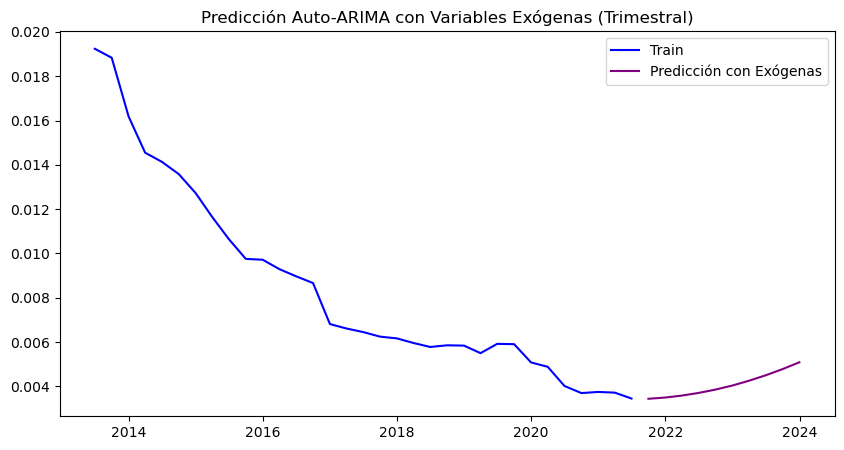

In [31]:
# Variables exógenas
exog_train = train[['Paro', 'PIB', 'Precio_vivienda', 'Mora_Adq_Vivienda']]
exog_test = test[['Paro', 'PIB', 'Precio_vivienda', 'Mora_Adq_Vivienda']]

# Ajuste del modelo con variables exógenas
modelo_auto_arima_exog = auto_arima(
    y_train,
    exogenous=exog_train,  # Las variables exógenas
    seasonal=True,          # Activar estacionalidad
    m=4,                    # Estacionalidad trimestral (4 trimestres por año)
    stepwise=True,          # Búsqueda paso a paso de parámetros
    suppress_warnings=True,
    trace=True
)

# Predicción con variables exógenas en el conjunto de prueba
predicciones_exog = modelo_auto_arima_exog.predict(n_periods=len(test), exogenous=exog_test)

# Resultados
resultado_predicciones_exog = pd.DataFrame({
    'FECHA': test.index,
    'Tasa incumplimiento predicha': predicciones_exog
}).set_index('FECHA')

print(resultado_predicciones_exog)

# Visualización
plt.figure(figsize=(10, 5))
plt.plot(y_train, label='Train', color='blue')
plt.plot(resultado_predicciones_exog, label='Predicción con Exógenas', color='purple')
plt.legend()
plt.title('Predicción Auto-ARIMA con Variables Exógenas (Trimestral)')
plt.show()


In [32]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Asumimos que tienes las variables exógenas como 'Paro', 'PIB', etc., en tu dataframe train.
# Asegúrate de que los valores exógenos no tengan valores nulos

# Crear las variables exógenas (features) y la variable objetivo
X_train = train[['Paro', 'PIB', 'Precio_vivienda', 'Mora_Adq_Vivienda']]  # Variables exógenas
y_train = train['Tasa_incumplimiento']  # Variable a predecir

X_test = test[['Paro', 'PIB', 'Precio_vivienda', 'Mora_Adq_Vivienda']]  # Variables exógenas
# y_test = test['Tasa incumplimiento']  # Variable a predecir

# Asegúrate de no tener valores nulos
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

# Dividir en entrenamiento y validación para evaluar el modelo
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [33]:
# Ajustar el modelo XGBoost
model = xgb.XGBRegressor(
    objective='reg:squarederror',  # Para regresión
    eval_metric='rmse',  # Métrica para evaluar el modelo
    n_estimators=1000,  # Número de árboles
    learning_rate=0.01,  # Tasa de aprendizaje
    max_depth=6,  # Profundidad máxima de los árboles
    colsample_bytree=0.8,  # Porcentaje de columnas para cada árbol
    subsample=0.8  # Porcentaje de muestras por árbol
)

# Entrenar el modelo
model.fit(X_train_split, y_train_split, eval_set=[(X_val_split, y_val_split)], early_stopping_rounds=50, verbose=True)


[0]	validation_0-rmse:0.48847
[1]	validation_0-rmse:0.48382
[2]	validation_0-rmse:0.47922
[3]	validation_0-rmse:0.47469
[4]	validation_0-rmse:0.47019
[5]	validation_0-rmse:0.46572
[6]	validation_0-rmse:0.46129
[7]	validation_0-rmse:0.45691
[8]	validation_0-rmse:0.45256
[9]	validation_0-rmse:0.44825
[10]	validation_0-rmse:0.44402
[11]	validation_0-rmse:0.43981
[12]	validation_0-rmse:0.43559
[13]	validation_0-rmse:0.43145
[14]	validation_0-rmse:0.42738
[15]	validation_0-rmse:0.42332
[16]	validation_0-rmse:0.41932
[17]	validation_0-rmse:0.41532
[18]	validation_0-rmse:0.41136
[19]	validation_0-rmse:0.40746
[20]	validation_0-rmse:0.40358
[21]	validation_0-rmse:0.39973
[22]	validation_0-rmse:0.39593
[23]	validation_0-rmse:0.39217
[24]	validation_0-rmse:0.38846
[25]	validation_0-rmse:0.38477
[26]	validation_0-rmse:0.38110
[27]	validation_0-rmse:0.37747
[28]	validation_0-rmse:0.37392
[29]	validation_0-rmse:0.37037
[30]	validation_0-rmse:0.36684
[31]	validation_0-rmse:0.36334
[32]	validation_0-

c:\Users\ibene\.conda\envs\DM_reto9\lib\site-packages\xgboost\sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[165]	validation_0-rmse:0.10221
[166]	validation_0-rmse:0.10124
[167]	validation_0-rmse:0.10029
[168]	validation_0-rmse:0.09935
[169]	validation_0-rmse:0.09842
[170]	validation_0-rmse:0.09750
[171]	validation_0-rmse:0.09659
[172]	validation_0-rmse:0.09568
[173]	validation_0-rmse:0.09479
[174]	validation_0-rmse:0.09391
[175]	validation_0-rmse:0.09304
[176]	validation_0-rmse:0.09217
[177]	validation_0-rmse:0.09132
[178]	validation_0-rmse:0.09046
[179]	validation_0-rmse:0.08962
[180]	validation_0-rmse:0.08878
[181]	validation_0-rmse:0.08795
[182]	validation_0-rmse:0.08713
[183]	validation_0-rmse:0.08631
[184]	validation_0-rmse:0.08551
[185]	validation_0-rmse:0.08472
[186]	validation_0-rmse:0.08393
[187]	validation_0-rmse:0.08315
[188]	validation_0-rmse:0.08238
[189]	validation_0-rmse:0.08162
[190]	validation_0-rmse:0.08085
[191]	validation_0-rmse:0.08011
[192]	validation_0-rmse:0.07937
[193]	validation_0-rmse:0.07863
[194]	validation_0-rmse:0.07790
[195]	validation_0-rmse:0.07718
[196]	va

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.8,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric='rmse', gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.01, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

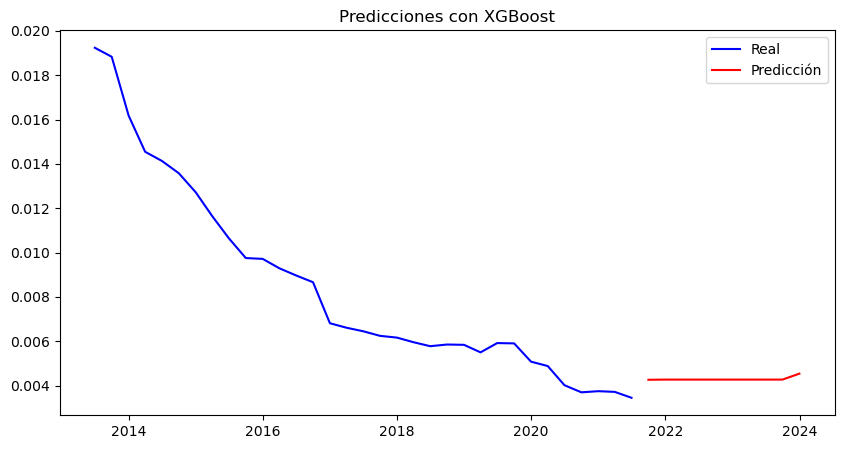

In [34]:
predicciones = model.predict(X_test)
import matplotlib.pyplot as plt

# Visualizar las predicciones
plt.figure(figsize=(10,5))
plt.plot(train.index, y_train, label='Real', color='blue')
plt.plot(test.index, predicciones, label='Predicción', color='red')
plt.title('Predicciones con XGBoost')
plt.legend()
plt.show()
